

# Bitcoin Forcasting

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
# Importing the necessary libraries
import pandas as pd
import yfinance as yf
import numpy as np
from datetime import date, timedelta
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import LSTM, Dropout, Dense, Activation
from keras.callbacks import TensorBoard, ModelCheckpoint, ReduceLROnPlateau
import datetime

# Downloading the dataset
today = date.today()
end_date = today.strftime("%Y-%m-%d")
start_date = (today - timedelta(days=5000)).strftime("%Y-%m-%d")
df = yf.download("BTC-USD", start=start_date, end=end_date, progress=False)

In [2]:
df.sort_index(axis=0, inplace=True)

NameError: name 'df' is not defined

In [4]:
df


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,21056800
2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,34483200
2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,37919700
2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,36863600
2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,26580100
...,...,...,...,...,...,...
2024-04-08,69362.554688,72715.359375,69064.242188,71631.359375,71631.359375,37261432669
2024-04-09,71632.500000,71742.507812,68212.921875,69139.015625,69139.015625,36426900409
2024-04-10,69140.242188,71093.429688,67503.562500,70587.882812,70587.882812,38318601774


In [5]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,3496.000000,3496.000000,3496.000000,3496.000000,3496.000000,3.496000e+03
mean,15766.026211,16135.559988,15373.785853,15783.863946,15783.863946,1.706793e+10
std,17470.077227,17891.920498,17011.117887,17487.314231,17487.314231,1.926983e+10
min,176.897003,211.731003,171.509995,178.102997,178.102997,5.914570e+06
25%,1002.361267,1032.875000,976.547989,1004.524994,1004.524994,2.055113e+08
50%,8617.899902,8808.160156,8372.562500,8658.098145,8658.098145,1.272957e+10
75%,26586.079590,27034.295410,26263.206055,26622.657715,26622.657715,2.747484e+10
max,73079.375000,73750.070312,71334.093750,73083.500000,73083.500000,3.509679e+11


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3496 entries, 2014-09-17 to 2024-04-12
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       3496 non-null   float64
 1   High       3496 non-null   float64
 2   Low        3496 non-null   float64
 3   Close      3496 non-null   float64
 4   Adj Close  3496 non-null   float64
 5   Volume     3496 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 191.2 KB


## Preprocessing

In [7]:
def format_data(num):
    nums = num.split(',');
    if(len(nums) == 2):
        n = float(nums[0] + nums[1])
    else:
        n = float(nums[0])
    return n

In [ ]:
df['Price'] = df['Price'].apply(format_data)

In [ ]:
df['Open'] = df['Open'].apply(format_data)

In [ ]:
df['High'] = df['High'].apply(format_data)

In [ ]:
df['Low'] = df['Low'].apply(format_data)

In [ ]:
from collections import Counter

arr=[]

for i in df["Vol."]:
  arr.append(i[-1])

Counter(arr).keys()

dict_keys(['K', 'M', 'B'])

In [8]:
def format_vol(x):
    if(x[-1] == 'K'):
        n = float(x[:-1]) * 1000
    elif(x[-1] == 'M'):
        n = float(x[:-1]) * 1000000
    elif(x[-1]== 'B'):
        n = float(x[:-1]) * 1000000000
    elif(x == '-'):
        n = 0
    return n

In [9]:
df['Vol.'] = df['Vol.'].apply(format_vol)

KeyError: 'Vol.'

In [10]:
def formate_change(x):
    n = float(x[:-1])
    return n

In [11]:
df['Change %'] = df['Change %'].apply(formate_change)

KeyError: 'Change %'

In [12]:
df

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,21056800
2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,34483200
2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,37919700
2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,36863600
2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,26580100
...,...,...,...,...,...,...
2024-04-08,69362.554688,72715.359375,69064.242188,71631.359375,71631.359375,37261432669
2024-04-09,71632.500000,71742.507812,68212.921875,69139.015625,69139.015625,36426900409
2024-04-10,69140.242188,71093.429688,67503.562500,70587.882812,70587.882812,38318601774


In [13]:
df.isnull().sum()

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [14]:
df.isna().sum()

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3496 entries, 2014-09-17 to 2024-04-12
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       3496 non-null   float64
 1   High       3496 non-null   float64
 2   Low        3496 non-null   float64
 3   Close      3496 non-null   float64
 4   Adj Close  3496 non-null   float64
 5   Volume     3496 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 191.2 KB


In [16]:
df.nunique()

Open         3492
High         3493
Low          3494
Close        3493
Adj Close    3493
Volume       3496
dtype: int64

## Resampling Data

A - Year, M - Month End, W - Weekly, D - Daily, MS - Month Start

In [17]:
monthly_df = df['Open'].resample('MS').mean()

In [18]:
monthly_df

Date
2014-09-01      412.654003
2014-10-01      365.748000
2014-11-01      364.850235
2014-12-01      343.074836
2015-01-01      251.799905
                  ...     
2023-12-01    42401.449849
2024-01-01    42910.015373
2024-02-01    49231.727101
2024-03-01    67372.752394
2024-04-01    69040.560547
Freq: MS, Name: Open, Length: 116, dtype: float64

## Visulization

Overall Plot


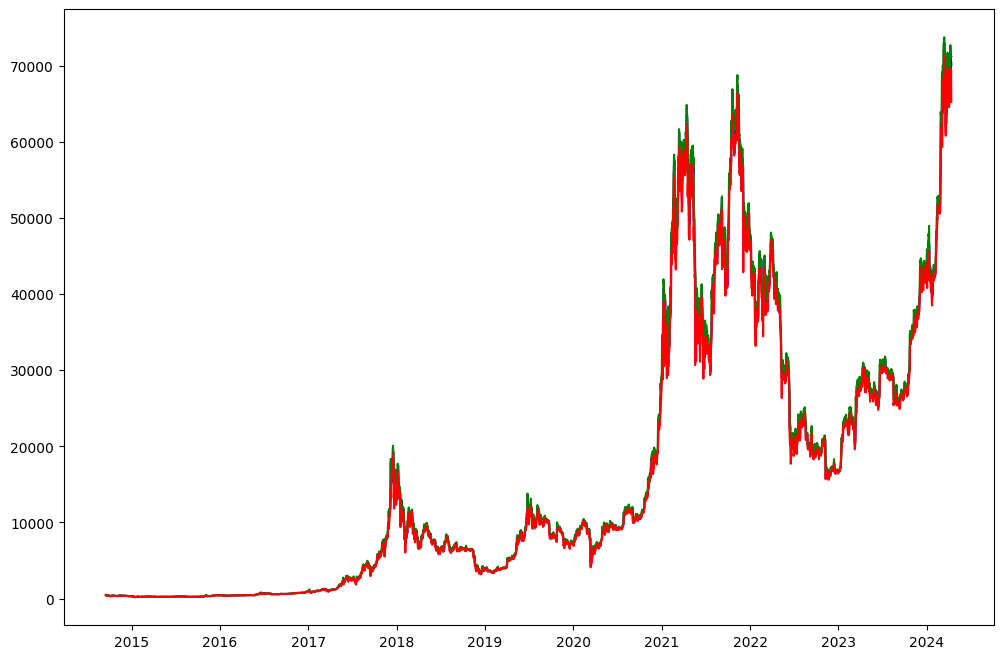

In [19]:
plt.figure(figsize=(12, 8))
plt.plot(df['Open'], color='blue')
plt.plot(df['High'], color='green')
plt.plot(df['Low'], color='red')

Yr 2021 Plot

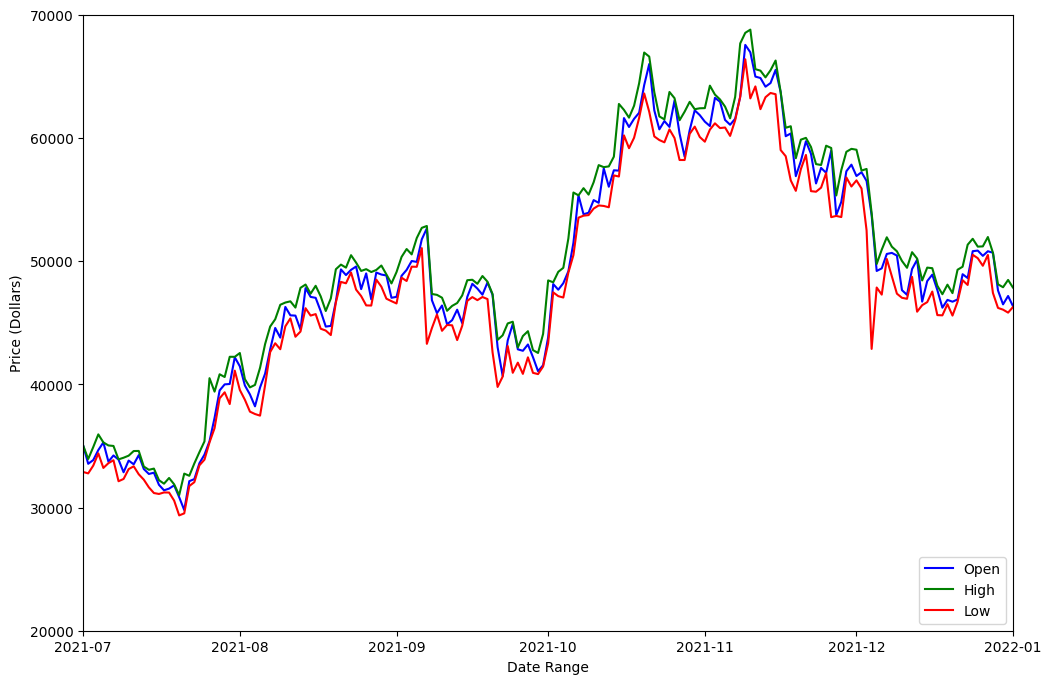

In [20]:
plt.figure(figsize=(12, 8))
plt.plot(df['Open'], color='blue', label="Open")
plt.plot(df['High'], color='green', label="High")
plt.plot(df['Low'], color='red', label="Low")
plt.xlim(datetime.date(2021, 7, 1), datetime.date(2022, 1, 1))
plt.ylim(20000,70000)
plt.xlabel("Date Range")
plt.ylabel("Price (Dollars)")
plt.legend(loc="lower right")

Overall Change

In [21]:
plt.figure(figsize=(8, 6))
plt.plot(df['Change %'])

KeyError: 'Change %'

<Figure size 800x600 with 0 Axes>

<Axes: xlabel='Date'>

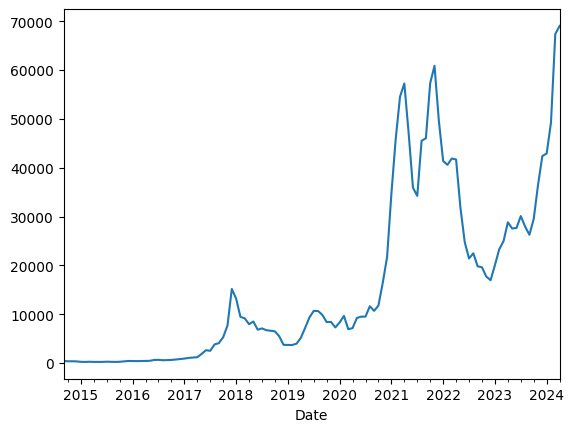

In [22]:
# Monthly Data plotting
monthly_df.plot()

Text(0, 0.5, 'Open cost')

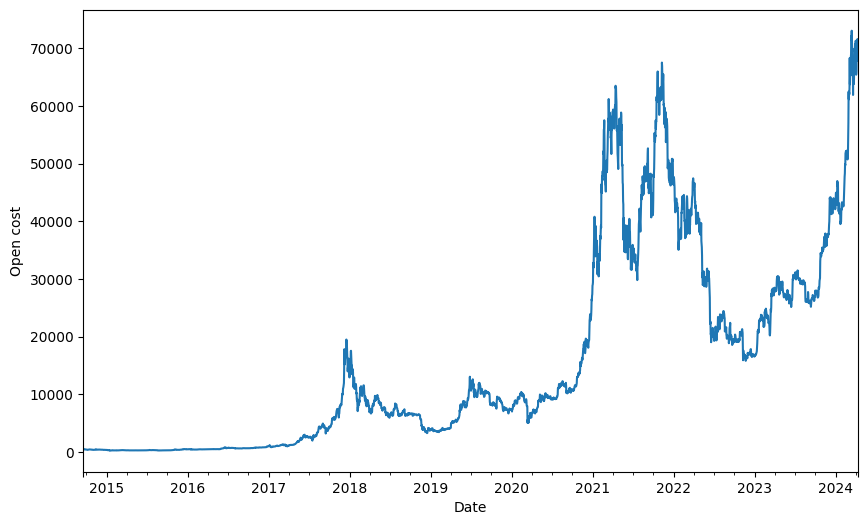

In [23]:
plt.figure(figsize=(10, 6))
df['Open'].plot()
plt.ylabel('Open cost')

Is this data stationary? (means mean, variance and covariance is constant over time.)

In [24]:
from statsmodels.tsa.seasonal import seasonal_decompose

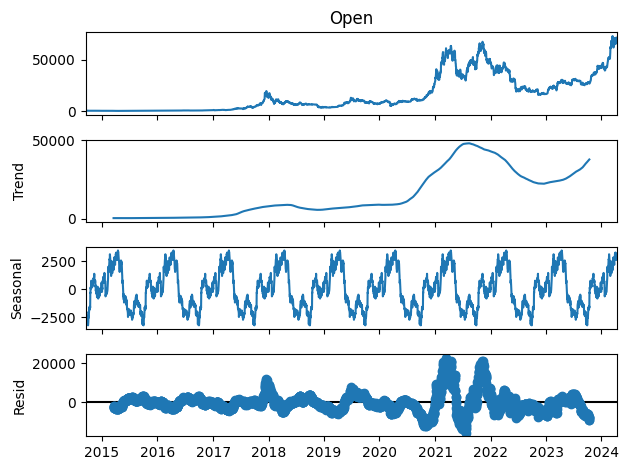

In [25]:
decomposition = seasonal_decompose(df['Open'], model='additive', period=365)
fig = decomposition.plot()
plt.show()

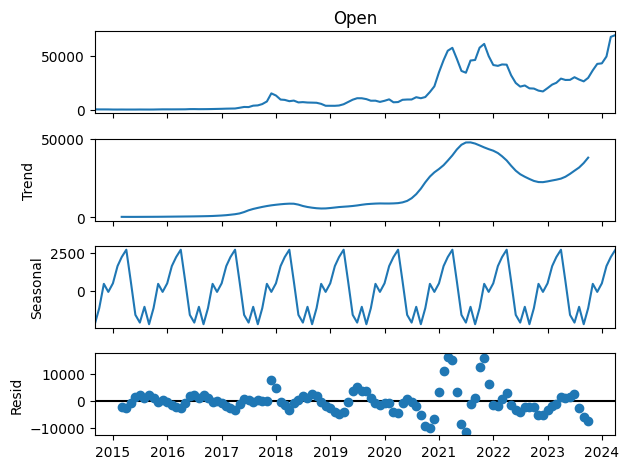

In [26]:
decomposition = seasonal_decompose(monthly_df, model='additive')
fig = decomposition.plot()
plt.show()

### To check if data is stationary

In [27]:
from statsmodels.tsa.stattools import adfuller

In [28]:
# h0: It is non stationary
# h1: It is stationary

def adfuller_test(data):
    result = adfuller(data)
    labels = ['ADF Test Statistic', 'p-value', '#Lags Used', 'Number of observations Used']
    for value, label in zip(result, labels):
        print(label+" : "+str(value))
    if result[1] <= 0.05:
        print("String evidence against the null hypothesis(h0), reject the null hypothesis. Data has no unit root and is stationary.")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary.")

In [29]:
adfuller_test(df['Open'])

ADF Test Statistic : -0.4054891789213878
p-value : 0.9091782389493128
#Lags Used : 29
Number of observations Used : 3466
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary.


In [30]:
adfuller_test(monthly_df)

ADF Test Statistic : -0.5611158521958316
p-value : 0.879528442098843
#Lags Used : 2
Number of observations Used : 113
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary.


## Making Stationary

In [31]:
p_values = []
for i in range(1, 62):
    tdf = df['Open'].diff(periods=i)
    res = adfuller(tdf.dropna())
    p_values.append([i, res[1]])
p_values.sort(key = lambda x: x[1])
p_values[:10]

[[2, 1.6947295378614046e-16],
 [31, 1.8889271904157507e-16],
 [32, 1.374354453584792e-15],
 [35, 6.264604970884749e-15],
 [8, 1.4958370922440026e-14],
 [33, 1.611892858961059e-14],
 [1, 1.9507273320207555e-14],
 [16, 2.441356765848362e-14],
 [34, 2.7603145964173755e-14],
 [17, 7.058209859311311e-14]]

In [32]:
rate_diff = df['Open'].diff(periods=27)
rate_diff.dropna(inplace=True)

In [33]:
rate_diff

Date
2014-10-14     -74.172028
2014-10-15     -55.904999
2014-10-16     -29.584991
2014-10-17     -11.916992
2014-10-18     -24.108978
                 ...     
2024-04-08   -2762.570312
2024-04-09     150.382812
2024-04-10   -3939.132812
2024-04-11    -812.140625
2024-04-12     668.898438
Name: Open, Length: 3469, dtype: float64

In [34]:
adfuller_test(rate_diff)

ADF Test Statistic : -5.425649586814935
p-value : 2.991405589929778e-06
#Lags Used : 29
Number of observations Used : 3439
String evidence against the null hypothesis(h0), reject the null hypothesis. Data has no unit root and is stationary.


<Axes: xlabel='Date'>

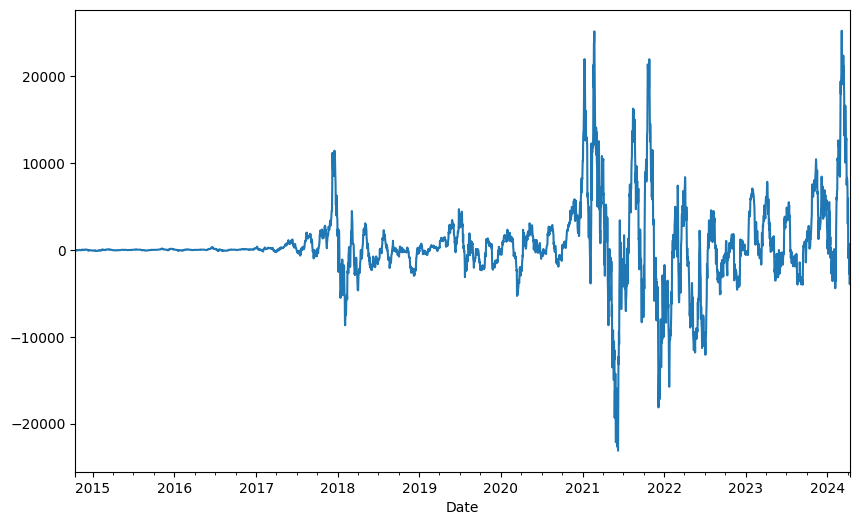

In [35]:
plt.figure(figsize=(10, 6))
rate_diff.plot()

Monthly data

In [36]:
p_values = []
for i in range(1, 12):
    tdf = monthly_df.diff(periods=i)
    res = adfuller(tdf.dropna())
    p_values.append([i, res[1]])
p_values.sort(key = lambda x: x[1])
p_values

[[1, 1.1847310813851304e-09],
 [10, 0.0031385471954327405],
 [9, 0.014196331017783219],
 [5, 0.017755184461586145],
 [8, 0.030810043207519976],
 [11, 0.044035616043796404],
 [6, 0.05549699266585522],
 [2, 0.06931396595295126],
 [7, 0.07907213445074635],
 [3, 0.08140875131135422],
 [4, 0.08480924167914106]]

In [37]:
seasonal_monthly_df = monthly_df.diff(periods=9)

In [38]:
seasonal_monthly_df

Date
2014-09-01             NaN
2014-10-01             NaN
2014-11-01             NaN
2014-12-01             NaN
2015-01-01             NaN
                  ...     
2023-12-01    17456.109438
2024-01-01    14086.173641
2024-02-01    21669.003941
2024-03-01    39720.825636
2024-04-01    38941.792969
Freq: MS, Name: Open, Length: 116, dtype: float64

In [39]:
adfuller_test(seasonal_monthly_df.dropna())

ADF Test Statistic : -3.315578124799753
p-value : 0.014196331017783219
#Lags Used : 12
Number of observations Used : 94
String evidence against the null hypothesis(h0), reject the null hypothesis. Data has no unit root and is stationary.


<Axes: xlabel='Date'>

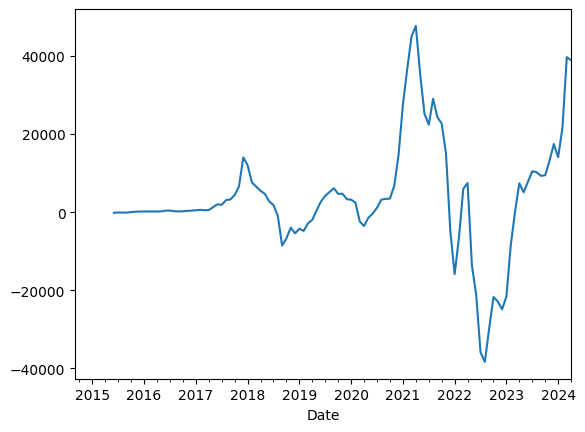

In [40]:
seasonal_monthly_df.plot()

## Visulizing PACF and ACF Plots

In [41]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

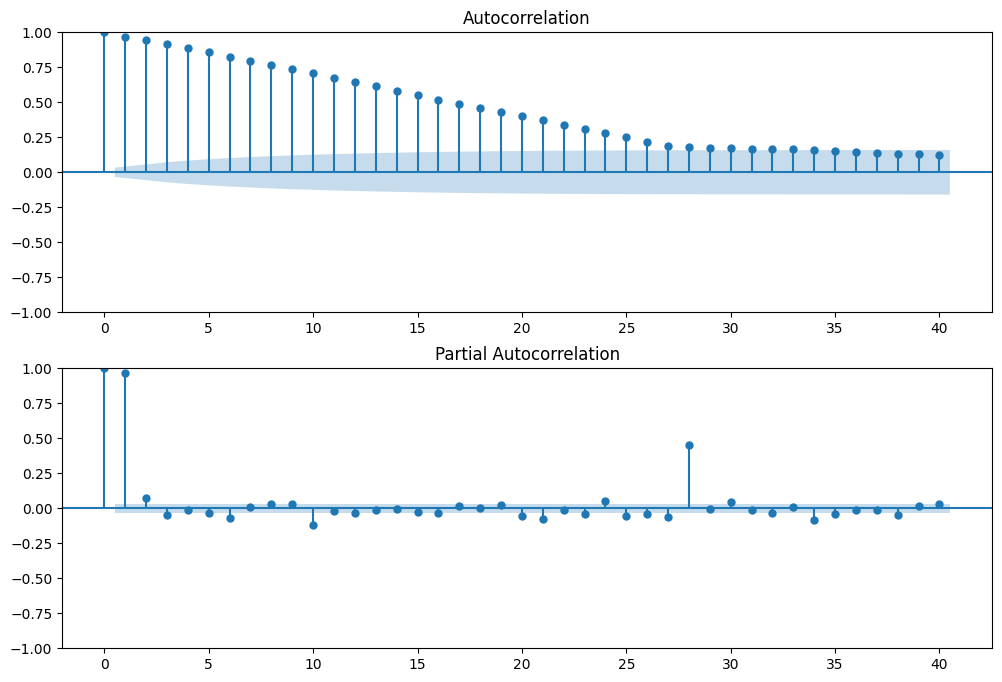

In [42]:
fig = plt.figure(figsize=(12, 8))
ax1 = fig.add_subplot(211)
fig = plot_acf(rate_diff.dropna(), lags=40, ax=ax1)
ax2 = fig.add_subplot(212)
fig = plot_pacf(rate_diff.dropna(), lags=40, ax=ax2)

AR value must be 2 (p). q will be 0

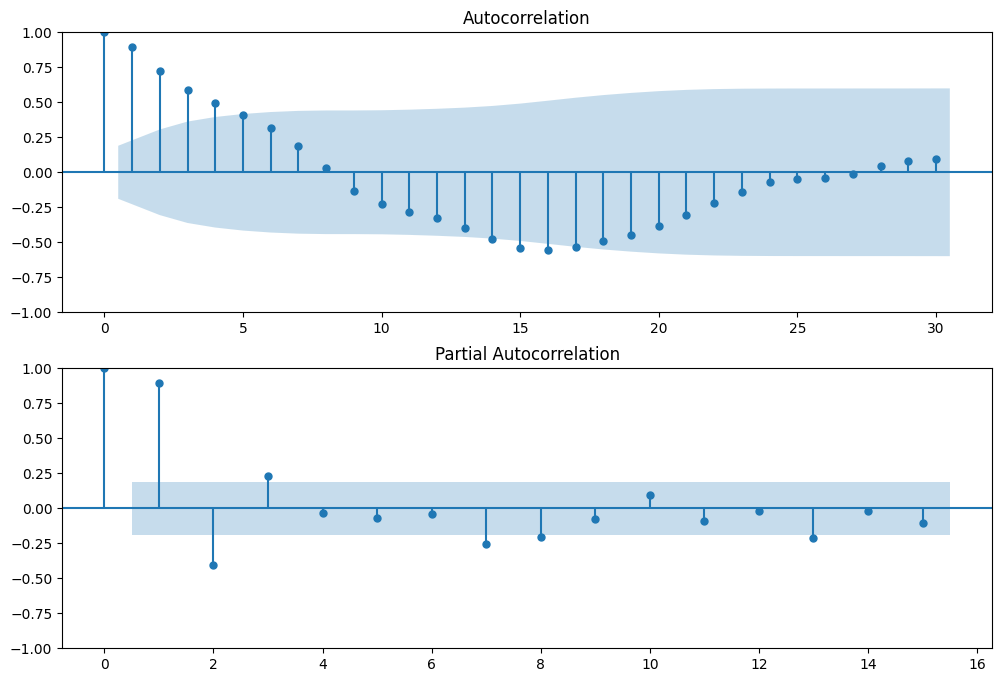

In [43]:
fig = plt.figure(figsize=(12, 8))
ax1 = fig.add_subplot(211)
fig = plot_acf(seasonal_monthly_df.dropna(), lags=30, ax=ax1)
#Here lags are basically the number of time  periods we skip to observe correlation in our data.
ax2 = fig.add_subplot(212)
fig = plot_pacf(seasonal_monthly_df.dropna(), lags=15, ax=ax2)

AR value must be 2 (p). q will be 0.

Since our data is seasonally changing we have a wave like plot for the autocorrelation. This pattern decreases gradually as the number of lags increase.

Looking at the partial autocorrelation plot we can see that there is no specific pattern which is being formed for a moving average or an autoregressive model.

So it is likely for ARIMA model to fail. Therefore to prove this we can try modelling and then go ahead with some other better model.

## Modeling

In [44]:
# Spliting the data into training and testing
X = df['Open']
print("Total Length of data:",len(X))
print("93% of data will be:", len(X)*0.93)
train_limit = int(len(X)*0.93)

Total Length of data: 3496
93% of data will be: 3251.28


In [45]:
train_x = X[:train_limit]
test_x = X[train_limit:]

In [46]:
test_x

Date
2023-08-12    29399.787109
2023-08-13    29416.593750
2023-08-14    29283.263672
2023-08-15    29408.048828
2023-08-16    29169.074219
                  ...     
2024-04-08    69362.554688
2024-04-09    71632.500000
2024-04-10    69140.242188
2024-04-11    70575.734375
2024-04-12    70061.382812
Name: Open, Length: 245, dtype: float64

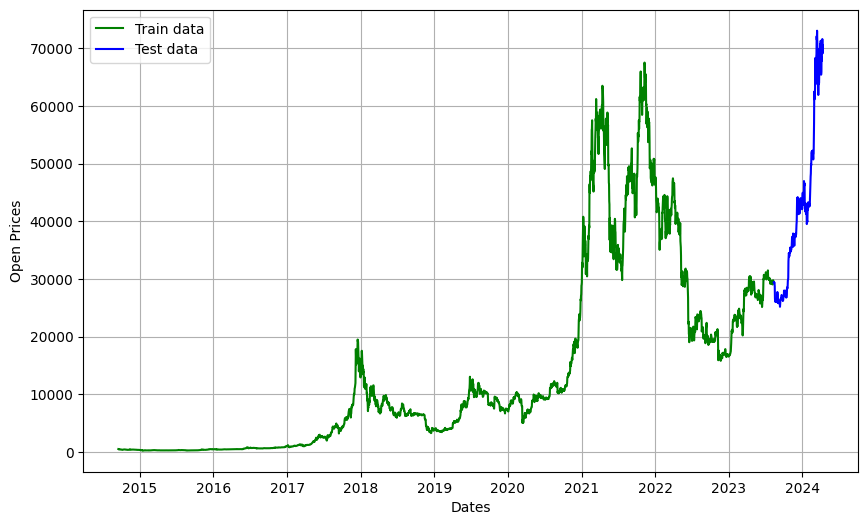

In [47]:
plt.figure(figsize=(10, 6))
plt.grid(True)
plt.xlabel("Dates")
plt.ylabel("Open Prices")
plt.plot(train_x, 'green', label='Train data')
plt.plot(test_x, 'blue', label='Test data')
plt.legend()

##  ARIMA Model

In [48]:
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error

In [49]:
model_arima = ARIMA(train_x, order=(4, 1, 0))
model_arima_fit = model_arima.fit()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


In [50]:
arima_pred = model_arima_fit.predict(start=train_limit, end=len(X)-1)

In [51]:
arima_pred_df = pd.DataFrame(arima_pred)
arima_pred_df = arima_pred_df.set_index(test_x.index)
arima_pred_df

,predicted_mean
Date,
2023-08-12,29444.567770
2023-08-13,29458.244823
2023-08-14,29448.291106
2023-08-15,29444.468180
2023-08-16,29445.450339
...,...
2024-04-08,29445.150307
2024-04-09,29445.150307
2024-04-10,29445.150307


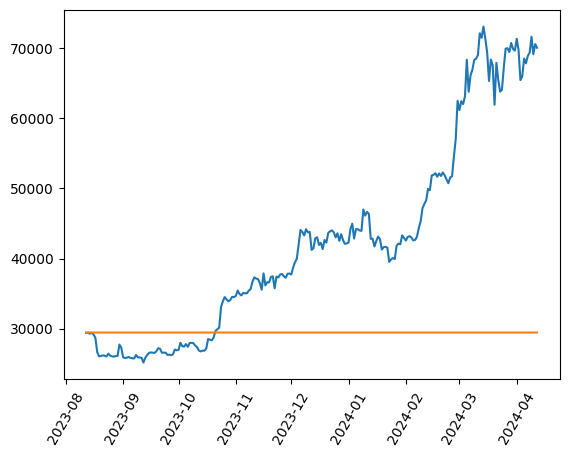

In [52]:
plt.plot(test_x)
plt.plot(arima_pred_df)
plt.xticks(rotation=60)
# plt.xlim(datetime.date(2021, 1, 1), datetime.date(2021, 5, 1))
plt.show()

As we can see that it does not do a good job as it is a very basic model and does not have seasonality involved.

In [53]:
monthly_df

Date
2014-09-01      412.654003
2014-10-01      365.748000
2014-11-01      364.850235
2014-12-01      343.074836
2015-01-01      251.799905
                  ...     
2023-12-01    42401.449849
2024-01-01    42910.015373
2024-02-01    49231.727101
2024-03-01    67372.752394
2024-04-01    69040.560547
Freq: MS, Name: Open, Length: 116, dtype: float64

In [54]:
monthly_train_len = len(monthly_df)*0.9
monthly_train_len

104.4

In [55]:
monthly_df.index[64]

Timestamp('2020-01-01 00:00:00')

In [56]:
train_monthly = monthly_df[:int(monthly_train_len)]
test_monthly = monthly_df[int(monthly_train_len):]

In [57]:
model_monthly = ARIMA(train_monthly, order=(4, 1, 0) )
model_arima_fit = model_arima.fit()

In [58]:
train_monthly.describe()

count      104.000000
mean     13245.220691
std      16005.830472
min        232.821856
25%        709.549798
50%       7250.779825
75%      19667.406141
max      60857.520312
Name: Open, dtype: float64

In [59]:
arima_pred_monthly = model_arima_fit.predict(start=int(monthly_train_len), end=len(monthly_df)-1)

In [60]:
arima_pred_monthly_df = pd.DataFrame(arima_pred_monthly)
arima_pred_monthly_df.set_index(test_monthly.index, inplace=True)
arima_pred_monthly_df

,predicted_mean
Date,
2023-05-01,317.627135
2023-06-01,312.935853
2023-07-01,310.579238
2023-08-01,320.065205
2023-09-01,314.155851
2023-10-01,314.905992
2023-11-01,282.412271
2023-12-01,265.118630
2024-01-01,273.500730


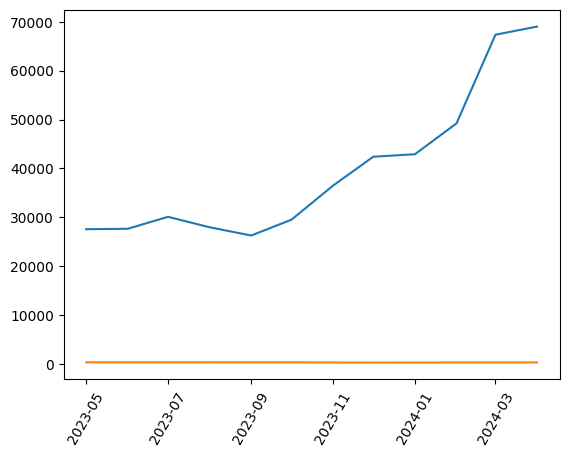

In [61]:
plt.plot(test_monthly)
plt.plot(arima_pred_monthly_df)
plt.xticks(rotation=60)
# plt.xlim(datetime.date(2016, 5, 13), datetime.date(2016, 5, 20))
plt.show()

## ARIMA Model with updating train with current data

In [62]:
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [63]:
training_data = list(train_x)
testing_data = list(test_x)

In [64]:
model_predictions = []
n_test_obser = len(testing_data)

In [65]:
for i in range(n_test_obser):
    model = ARIMA(training_data, order = (4,1,0))
    model_fit = model.fit()
    output = model_fit.forecast()
    yhat = output[0]
    model_predictions.append(yhat)
    actual_test_value = testing_data[i]
    training_data.append(actual_test_value)

In [66]:
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 3495
Model:                 ARIMA(4, 1, 0)   Log Likelihood              -28459.457
Date:                Sat, 13 Apr 2024   AIC                          56928.913
Time:                        11:01:27   BIC                          56959.707
Sample:                             0   HQIC                         56939.904
                               - 3495                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0538      0.008     -6.685      0.000      -0.070      -0.038
ar.L2          0.0094      0.009      1.081      0.280      -0.008       0.026
ar.L3          0.0411      0.009      4.372      0.0

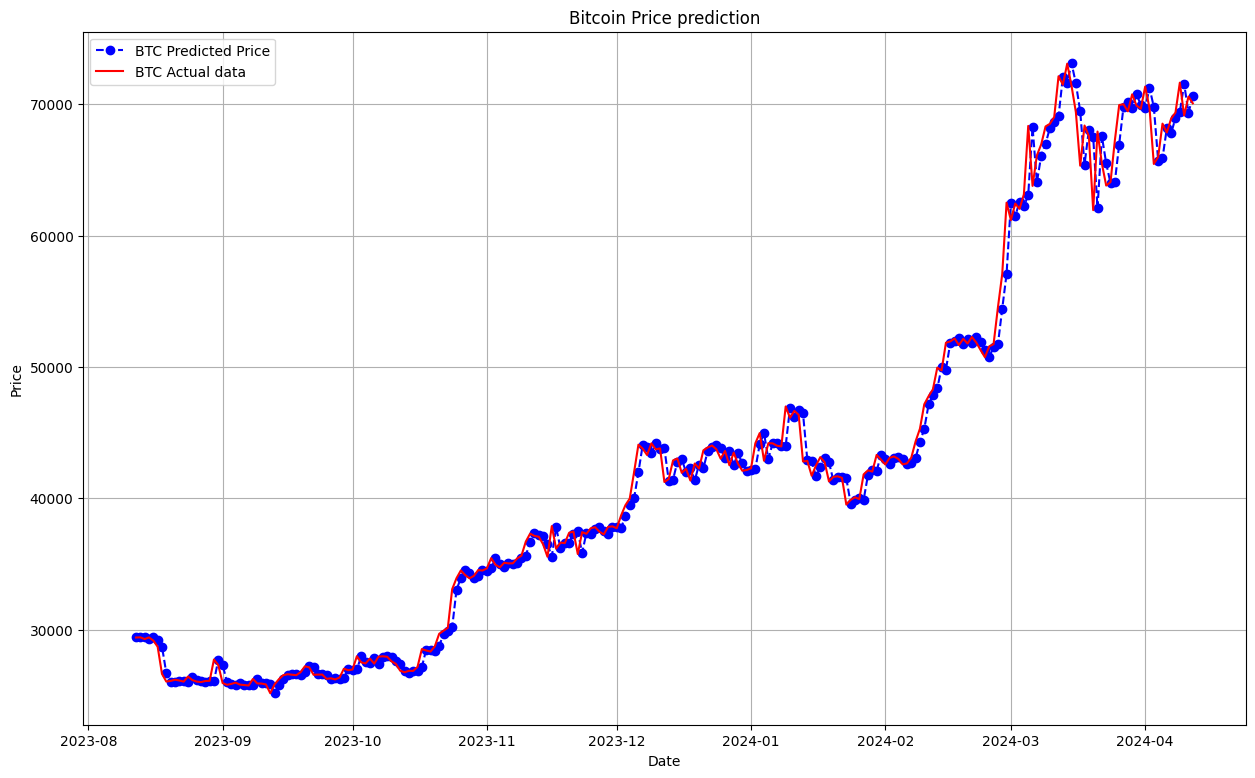

In [67]:
plt.figure(figsize=(15, 9))
plt.grid()

date_range = df[train_limit:].index
plt.plot(date_range, model_predictions, color='blue', marker='o', linestyle='dashed', label="BTC Predicted Price")
plt.plot(date_range, testing_data, color='red', label='BTC Actual data')

plt.title('Bitcoin Price prediction')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

In [68]:
# Mean absolute percentage error
mape = np.mean(np.abs(np.array(model_predictions) - np.array(testing_data))/np.abs(testing_data))
print("MAPE:", mape)

MAPE: 0.017608231730370676


In [69]:
mean_squared_error(testing_data, model_predictions)

1756135.6608021692

In [70]:
np.mean(testing_data)

42169.631823979595

## SARIMA

In [71]:
import statsmodels.api as sm

From above:  
AR value must be 2 (p). q will be 0. d = 1, season = 3  
AR value must be 2 (p). q will be 0. d = 1, season = 6

In [72]:
sarima_model_daily = sm.tsa.statespace.SARIMAX(train_x, order=(2, 1, 0), seasonal_order=(2, 1, 0, 3))
result_daily = sarima_model_daily.fit()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


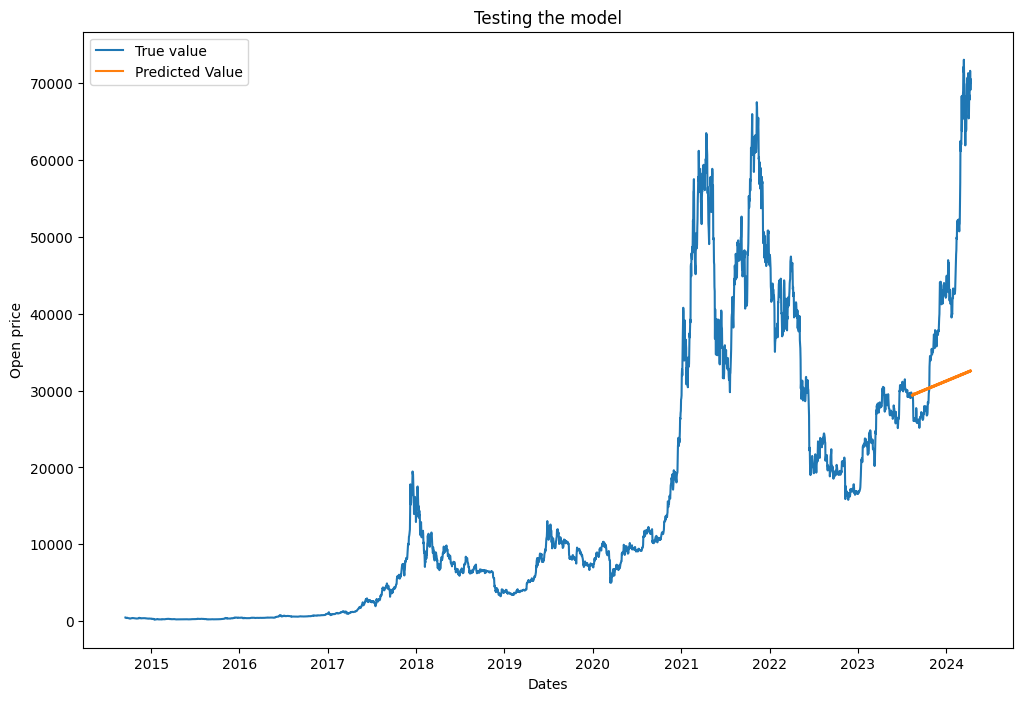

In [73]:
plt.figure(figsize=(12, 8))
daily_prediction = result_daily.predict(start=train_limit, end=len(X)-1)
plt.plot(X.index, X, label="True value")
plt.plot(daily_prediction, label="Predicted Value")
plt.xlabel("Dates")
plt.ylabel("Open price")
plt.title("Testing the model")
plt.legend()

In [74]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [75]:
daily_prediction

2023-08-12    29401.454587
2023-08-13    29333.328645
2023-08-14    29298.562136
2023-08-15    29465.838098
2023-08-16    29378.205046
                  ...     
2024-04-08    32618.582986
2024-04-09    32516.786973
2024-04-10    32478.834533
2024-04-11    32657.735373
2024-04-12    32555.939360
Freq: D, Name: predicted_mean, Length: 245, dtype: float64

In [76]:
X[train_limit:]

Date
2023-08-12    29399.787109
2023-08-13    29416.593750
2023-08-14    29283.263672
2023-08-15    29408.048828
2023-08-16    29169.074219
                  ...     
2024-04-08    69362.554688
2024-04-09    71632.500000
2024-04-10    69140.242188
2024-04-11    70575.734375
2024-04-12    70061.382812
Name: Open, Length: 245, dtype: float64

In [77]:
print("Mean of target value:", X[train_limit:].mean())
print("Mean Absolute error:", mean_absolute_error(X[train_limit:], daily_prediction))
print("Root mean squared error:", np.sqrt(mean_squared_error(X[train_limit:], daily_prediction)))

Mean of target value: 42169.631823979595
Mean Absolute error: 12860.540115803944
Root mean squared error: 17403.692869301074


In [78]:
sarima_model_daily = sm.tsa.statespace.SARIMAX(df['Open'], order=(2, 1, 0), seasonal_order=(2, 1, 0, 3))
result_daily = sarima_model_daily.fit()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


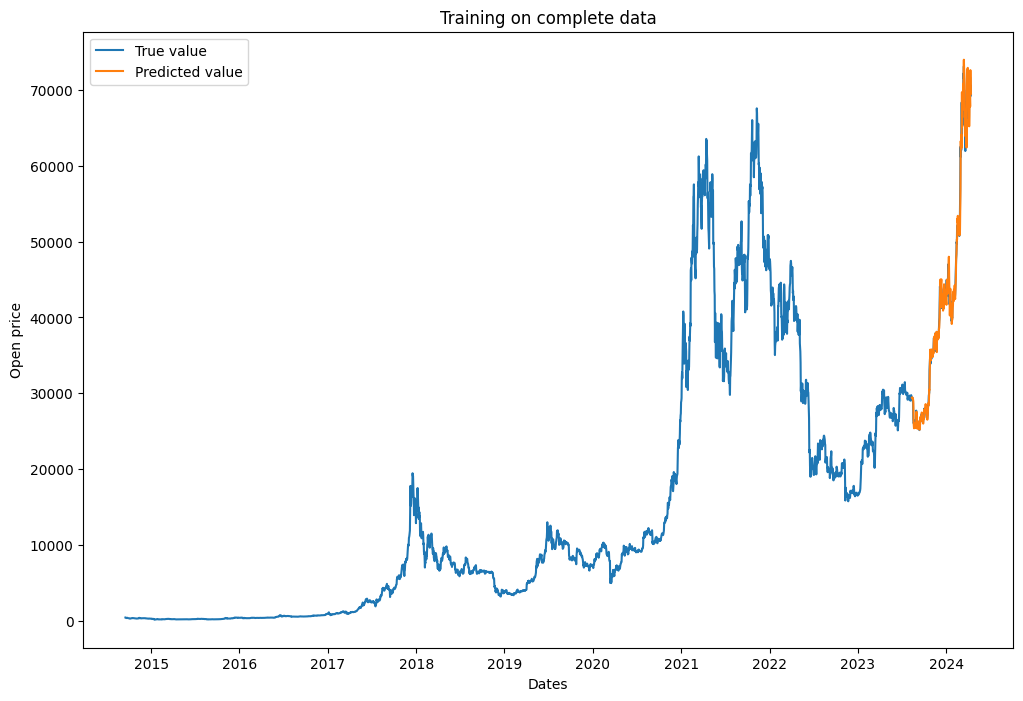

In [79]:
plt.figure(figsize=(12, 8))
daily_prediction = result_daily.predict(start=train_limit, end=len(X)-1)
plt.plot(X.index, X, label="True value")
plt.plot(daily_prediction, label="Predicted value")
plt.xlabel("Dates")
plt.ylabel("Open price")
plt.title("Training on complete data")
plt.legend()

In [80]:
X_monthly = monthly_df
print("Total Length of data:",len(X_monthly))
print("90% of data will be:", len(X_monthly)*0.9)
train_limit_monthly = int(len(X_monthly)*0.9)

Total Length of data: 116
90% of data will be: 104.4


In [81]:
train_x_monthly = X_monthly[:train_limit_monthly]
test_x_monthly = X_monthly[train_limit_monthly:]

In [82]:
sarima_model_monthly = sm.tsa.statespace.SARIMAX(train_x_monthly, order=(2, 1, 0), seasonal_order=(1, 1, 0, 6))
result_monthly = sarima_model_monthly.fit()

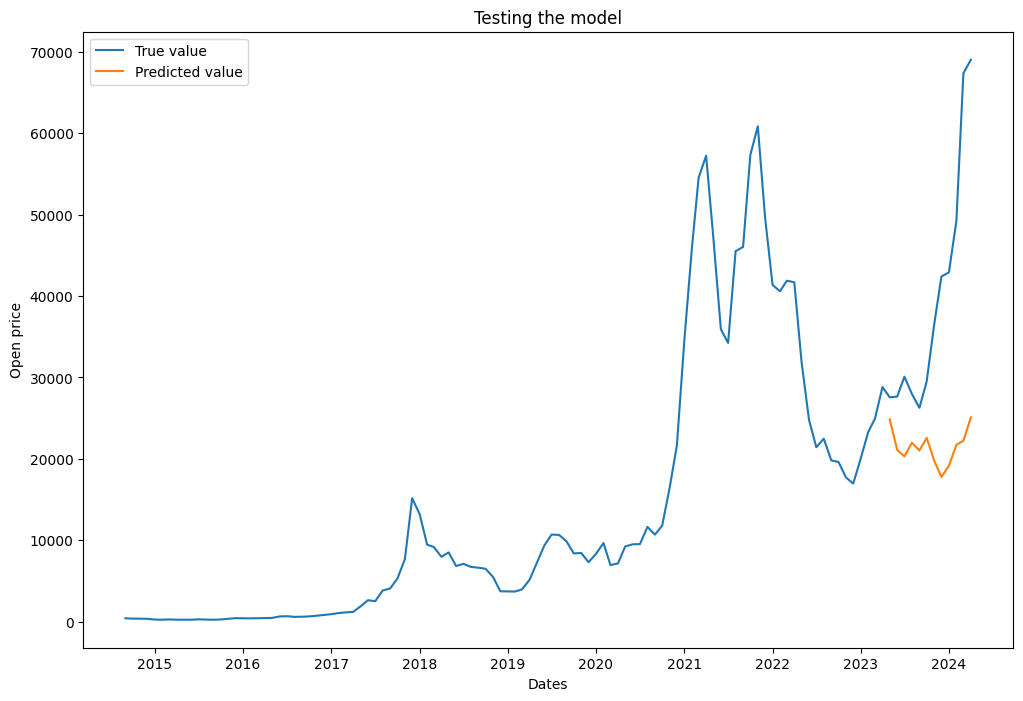

In [83]:
plt.figure(figsize=(12, 8))
monthly_prediction = result_monthly.predict(start=train_limit_monthly, end=len(X_monthly)-1)
plt.plot(X_monthly.index, X_monthly, label="True value")
plt.plot(monthly_prediction, label="Predicted value")
plt.xlabel("Dates")
plt.ylabel("Open price")
plt.title("Testing the model")
plt.legend()

In [84]:
test_x_monthly

Date
2023-05-01    27562.723160
2023-06-01    27651.926758
2023-07-01    30098.767578
2023-08-01    27959.756615
2023-09-01    26271.268229
2023-10-01    29511.811114
2023-11-01    36491.666667
2023-12-01    42401.449849
2024-01-01    42910.015373
2024-02-01    49231.727101
2024-03-01    67372.752394
2024-04-01    69040.560547
Freq: MS, Name: Open, dtype: float64

In [85]:
monthly_prediction

2023-05-01    24852.207572
2023-06-01    21095.376944
2023-07-01    20301.154862
2023-08-01    21975.310280
2023-09-01    21027.582931
2023-10-01    22578.817797
2023-11-01    19795.606817
2023-12-01    17761.578370
2024-01-01    19154.739026
2024-02-01    21721.866904
2024-03-01    22226.848173
2024-04-01    25083.990773
Freq: MS, Name: predicted_mean, dtype: float64

In [86]:
print("Mean of target value:", test_x_monthly.mean())
print("Mean Absolute error:", mean_absolute_error(test_x_monthly, monthly_prediction))
print("Root mean squared error:", np.sqrt(mean_squared_error(test_x_monthly, monthly_prediction)))

Mean of target value: 39708.70211545694
Mean Absolute error: 18244.112078122474
Root mean squared error: 23157.11665733519


In [87]:
sarima_model_monthly = sm.tsa.statespace.SARIMAX(monthly_df, order=(2, 1, 0), seasonal_order=(1, 1, 0, 6))
result_monthly = sarima_model_monthly.fit()

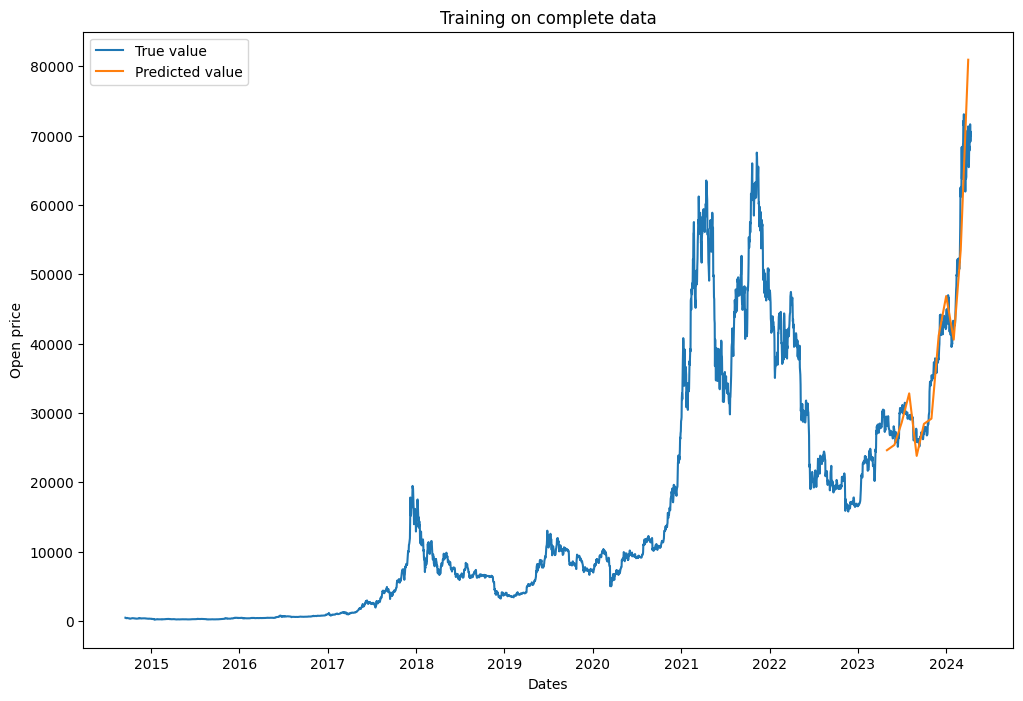

In [88]:
plt.figure(figsize=(12, 8))
monthly_prediction = result_monthly.predict(start=train_limit_monthly, end=len(X_monthly)-1)
plt.plot(X.index, X, label="True value")
plt.plot(monthly_prediction, label="Predicted value")
plt.xlabel("Dates")
plt.ylabel("Open price")
plt.title("Training on complete data")
plt.legend()

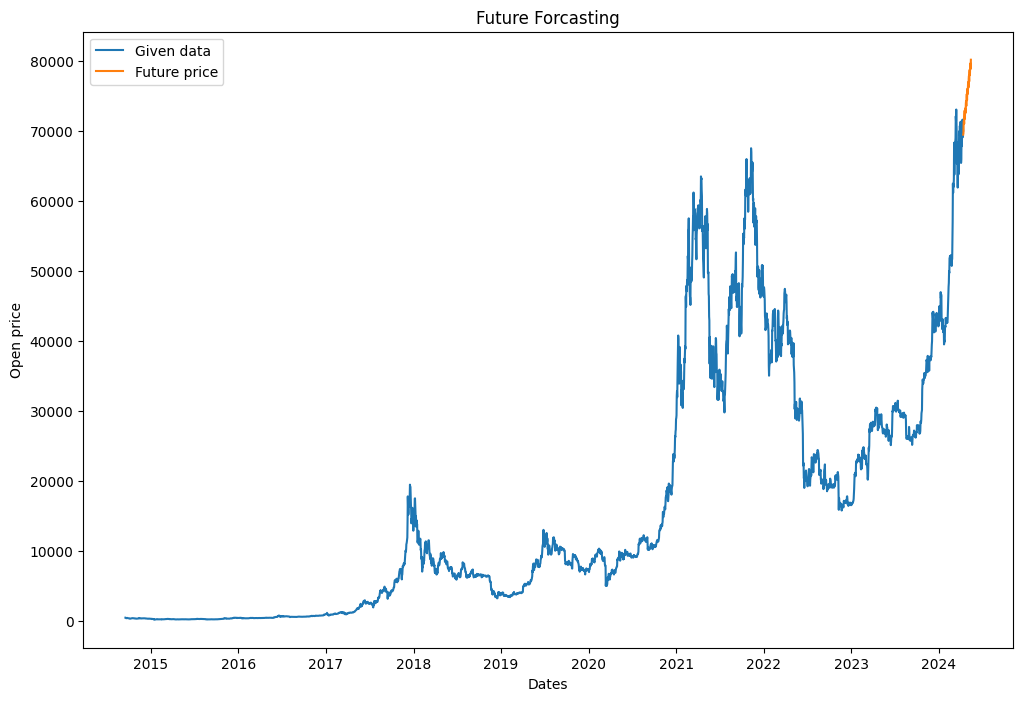

In [89]:
plt.figure(figsize=(12, 8))
future_pred = result_daily.predict(start=len(X)-1, end=len(X)+31)
plt.plot(X.index, X, label="Given data")
plt.plot(future_pred, label="Future price")
plt.xlabel("Dates")
plt.ylabel("Open price")
plt.title("Future Forcasting")
plt.legend()

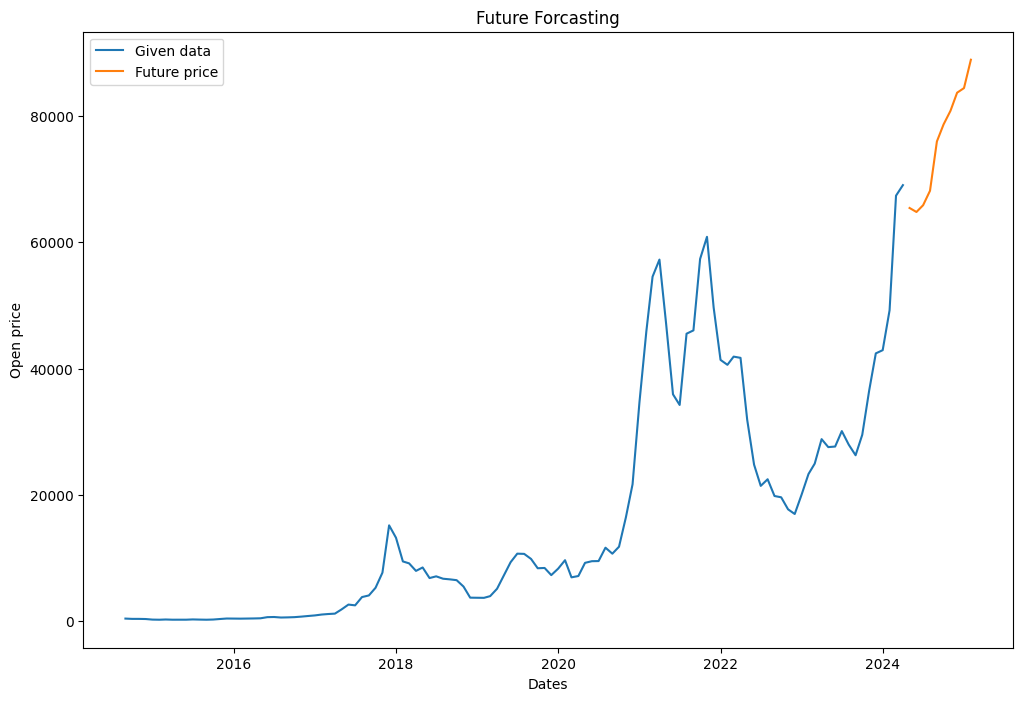

In [90]:
plt.figure(figsize=(12, 8))
future_pred_monthly = result_monthly.predict(start=len(X_monthly), end=len(X_monthly)+9)
plt.plot(X_monthly.index, X_monthly, label="Given data")
plt.plot(future_pred_monthly, label="Future price")
plt.xlabel("Dates")
plt.ylabel("Open price")
plt.title("Future Forcasting")
plt.legend()

## Pickling the Final Models

In [91]:
import pickle

In [93]:
model_daily_path = 'bitcoin_daily.pkl'
pickle.dump(result_daily, open(model_daily_path, 'wb'))

In [95]:
model_monthly_path = 'bitcoin_monthly.pkl'
pickle.dump(result_monthly, open(model_monthly_path, 'wb'))